In [1]:
!mkdir data
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/lenta.txt.zip -P data
!unzip -o data/lenta.txt.zip -d data/
corpus = open('data/lenta.txt').read()

�������� ��� 䠩� data 㦥 �������.


"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"unzip" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [2]:
import nltk
nltk.download('punkt_tab')
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
import re
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\fenlich\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fenlich\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Задание 1.

Посчитайте частоты для 5-грамм в корпусе lenta.txt. двумя способами:  
1) lenta.txt -> sent_tokenize (russian) -> word_tokenize -> ngrammer  
2) lenta.txt -> word_tokene(preserve_line=True) - ngrammer  
    
Проанализируйте топ-20 самых частотных нграмм и проверьте есть ли различия? 

In [3]:
def ngrammer(tokens, n=2):
    ngrams = []
    for i in range(len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams

In [4]:
# 1) lenta.txt -> sent_tokenize (russian) -> word_tokenize -> ngrammer  
sentences = sent_tokenize(corpus, language='russian')
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
tokenized_sentences = [[token.lower() for token in sentence if not re.match(r'\W+', token)] 
                       for sentence in tokenized_sentences]
russian_stopwords = set(stopwords.words('russian'))
fivegram_counts = Counter()
for sentence in tokenized_sentences:
    fivegram_counts.update(ngrammer([token for token in sentence if token not in russian_stopwords], 5))
fivegram_counts.most_common(20)

[('объединенной группировки войск северном кавказе', 83),
 ('сообщает риа новости ссылкой пресс-службу', 57),
 ('обязанности президента россии владимир путин', 47),
 ('группировки федеральных сил северном кавказе', 37),
 ('помощник президента россии сергей ястржембский', 35),
 ('делам печати телерадиовещания средств массовых', 31),
 ('объединенной группировки федеральных сил северном', 31),
 ('печати телерадиовещания средств массовых коммуникаций', 30),
 ('штабе объединенной группировки федеральных сил', 25),
 ('министр иностранных дел россии игорь', 24),
 ('первый заместитель начальника генерального штаба', 23),
 ('сообщает риа новости ссылкой источники', 23),
 ('объединенной группировкой войск северном кавказе', 23),
 ('иностранных дел россии игорь иванов', 23),
 ('прямом эфире радиостанции эхо москвы', 20),
 ('главного управления борьбе организованной преступностью', 20),
 ('начальника генерального штаба вооруженных сил', 20),
 ('заместитель начальника генштаба вооруженных сил', 20)

In [70]:
# 2) lenta.txt -> word_tokenize(preserve_line=True) - ngrammer
russian_stopwords = set(stopwords.words('russian'))
words = word_tokenize(corpus, preserve_line=True)
words = [token.lower() for token in words if not re.match(r'\W+', token) and token.lower() not in russian_stopwords]
fivegram_counts = Counter()
fivegram_counts.update(ngrammer(words, 5))
fivegram_counts.most_common(20)

[('сообщает риа новости ссылкой пресс-службу', 57),
 ('объединенной группировки войск северном кавказе', 56),
 ('обязанности президента россии владимир путин', 46),
 ('делам печати телерадиовещания средств массовых', 31),
 ('объединенной группировки федеральных сил северном', 31),
 ('печати телерадиовещания средств массовых коммуникаций', 29),
 ('объединенной группировки войск северном кавказе.', 27),
 ('министр иностранных дел россии игорь', 24),
 ('штабе объединенной группировки федеральных сил', 24),
 ('первый заместитель начальника генерального штаба', 23),
 ('сообщает риа новости ссылкой источники', 23),
 ('объединенной группировкой войск северном кавказе', 23),
 ('помощник президента россии сергей ястржембский', 21),
 ('прямом эфире радиостанции эхо москвы', 20),
 ('начальника генерального штаба вооруженных сил', 20),
 ('группировки федеральных сил северном кавказе', 20),
 ('заместитель начальника генштаба вооруженных сил', 20),
 ('сообщает федеральное агентство новостей ссылкой'

## Задание 2.

Найдите какую-то инетересную (по вашему мнению) закономерность на https://books.google.com/ngrams/ для русского языка (с 1990 по 2022)

Вставьте сюда скриншот
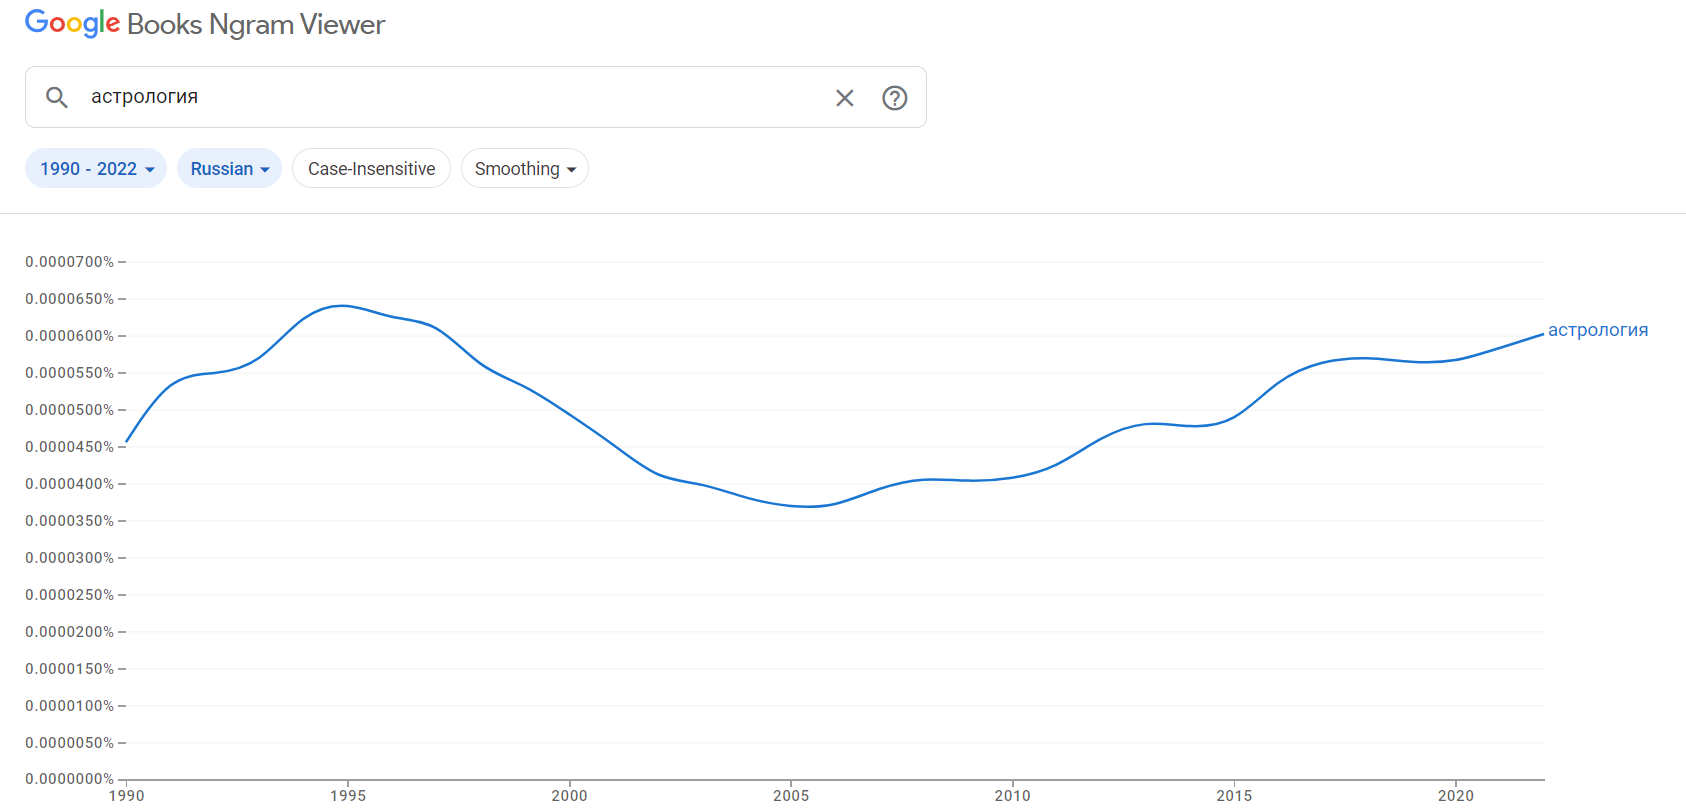

## Заданиe 3

Когда мы разбирали PMI мы использовали такую функцию:

In [5]:
# нграммер
def ngrammer(tokens, n=2, stops=set()):
    ngrams = []
    tokens = [token for token in tokens if token not in stops]
    for i in range(0,len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams

# сбор нграмм
def collect_stats(corpus, stops):
    
    unigrams = Counter()
    bigrams = Counter()
    
    for sent in corpus:
        unigrams.update(sent)
        bigrams.update(ngrammer(sent, 2, stops))
    
    return unigrams, bigrams

unigrams, bigrams = collect_stats(tokenized_sentences, russian_stopwords)


In [6]:
def scorer_simple(word_count_a, word_count_b, bigram_count, *args):
    try:
        score = bigram_count/((word_count_a+word_count_b))
    except ZeroDivisionError:
        return 0
    return score

In [7]:
import numpy as np

Но если вы посмотрите на определение в википедии, то увидите, что формула немного другая ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/094243d23c19d2d032f6bb26c4dc4f47d98d32f8)

Перепишите функцию, чтобы она точно соответствовала этому определению. Расчитайте PMI для всех биграммов также как мы делали в семинаре с помощью функции score_bigrams используя изначальный scorer и обновленный. Посмотрите есть ли разница в топ-10 биграммов. Подумайте почему результаты совпадают/отличаются?

*Подсказка: для вероятностей можно поделить на количество слов в корпусе

In [8]:
# вместо len(unigrams)
count = 0
for w in unigrams.values():
    count += w
print(count)

def scorer_improved(word_count_a, word_count_b, bigram_count, len_vocab = 0, *args):
    try:
        score = np.log2((bigram_count / (len_vocab - 1)) / ((word_count_a / len_vocab) * (word_count_b / len_vocab)))
    except ZeroDivisionError:
        return 0
    return score

def score_bigrams(unigrams, bigrams, scorer, threshold=-100000):
    ## посчитаем метрику для каждого нграмма
    bigram2score = Counter()
    len_vocab = count

    for bigram in bigrams:
        word_a, word_b = bigram.split()
        score = scorer(unigrams[word_a], unigrams[word_b], bigrams[bigram], len_vocab)
        
        ## если метрика выше порога, добавляем в словарик
        if score > threshold:
            bigram2score[bigram] = score
    
    return bigram2score

1493813


In [43]:
# изначальный scorer
bigram2score = score_bigrams(unigrams, bigrams, scorer_simple)
bigram2score.most_common(10)

[('сопоцкина друскеник', 0.5),
 ('неприятель приблизившись', 0.5),
 ('саноку обстреливалась', 0.5),
 ('м.ю лермонтова', 0.5),
 ('австрийский аэроплан', 0.5),
 ('показывался аэроплан-птица', 0.5),
 ('das ist', 0.5),
 ('ist nesteroff', 0.5),
 ('песнь нестерове', 0.5),
 ('могучий унесся', 0.5)]

In [47]:
# обновленный scorer
bigram2score = score_bigrams(unigrams, bigrams, scorer_improved)
bigram2score.most_common(10)

[('сопоцкина друскеник', 20.510569093634725),
 ('неприятель приблизившись', 20.510569093634725),
 ('саноку обстреливалась', 20.510569093634725),
 ('м.ю лермонтова', 20.510569093634725),
 ('австрийский аэроплан', 20.510569093634725),
 ('показывался аэроплан-птица', 20.510569093634725),
 ('das ist', 20.510569093634725),
 ('ist nesteroff', 20.510569093634725),
 ('песнь нестерове', 20.510569093634725),
 ('могучий унесся', 20.510569093634725)]

## Задание 4*

Обновите функцию получившуюся в предыдущем задании так, чтобы вместо произведения/деления вероятностей использовались сложение и вычитание логирифмов. 

In [11]:
def scorer_log(word_count_a, word_count_b, bigram_count, len_vocab, *args):
    try:
        score = np.log2(bigram_count) - np.log2(word_count_a) - np.log2(word_count_b) + np.log2((len_vocab)**2 / (len_vocab - 1))
    except ZeroDivisionError:
        return 0
    return score

bigram2score = score_bigrams(unigrams, bigrams, scorer_log)
bigram2score.most_common(10)

[('сопоцкина друскеник', 20.510569093634725),
 ('неприятель приблизившись', 20.510569093634725),
 ('саноку обстреливалась', 20.510569093634725),
 ('м.ю лермонтова', 20.510569093634725),
 ('австрийский аэроплан', 20.510569093634725),
 ('показывался аэроплан-птица', 20.510569093634725),
 ('das ist', 20.510569093634725),
 ('ist nesteroff', 20.510569093634725),
 ('песнь нестерове', 20.510569093634725),
 ('могучий унесся', 20.510569093634725)]

## Задание 5

Исследуйте gensim.models.Phrases. Проверьте сколько дефолтных scoring функций есть в этом классе. Попробуйте все доступные по умолчанию scoring функции и попробуйте настраивать для них значение threshold и min_count. Попробуйте сделать так, чтобы собиралось как можно больше нграммов. Попробуйте строить последовательность gensim.models.Phrases, чтобы строить более длинные нграммы

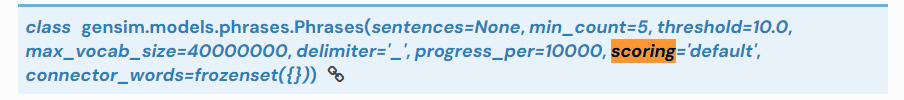

In [9]:
import gensim

In [79]:
ph = gensim.models.Phrases(tokenized_sentences, 
                           min_count=50, 
                           threshold=8.,
                           scoring='default')
p = gensim.models.phrases.Phraser(ph)

ph2 = gensim.models.Phrases(p[tokenized_sentences],  min_count=1, threshold=1., scoring='default')
p2 = gensim.models.phrases.Phraser(ph2)

ph3 = gensim.models.Phrases(p2[tokenized_sentences],  min_count=1, threshold=1., scoring='default')
p3 = gensim.models.phrases.Phraser(ph3)


In [75]:
print(p[tokenized_sentences[10]])
print(p2[p[tokenized_sentences[10]]])
print(p3[p2[p[tokenized_sentences[10]]]])

# min_count = 1, threshold = 1

['русский_инвалид', '16_сентября', '1914', 'года.министерство', 'народного', 'просвещения', 'в_виду', 'происходящих', 'чрезвычайных', 'событий', 'признало', 'соответственным', 'в_день', 'годовщины_со', 'дня_рождения', 'м.ю', 'лермонтова', '2-го', 'октября', '1914_года', 'ограничиться', 'совершением', 'в_учебных', 'заведениях', 'панихиды_по', 'поэту', 'отложив', 'празднование', 'юбилея', 'до', 'более', 'благоприятного', 'времени']
['русский_инвалид_16_сентября', '1914', 'года.министерство', 'народного', 'просвещения', 'в_виду', 'происходящих', 'чрезвычайных', 'событий', 'признало', 'соответственным', 'в_день', 'годовщины_со_дня_рождения', 'м.ю', 'лермонтова', '2-го', 'октября', '1914_года', 'ограничиться', 'совершением', 'в_учебных', 'заведениях', 'панихиды_по', 'поэту', 'отложив', 'празднование', 'юбилея', 'до', 'более', 'благоприятного', 'времени']
['русский_инвалид_16_сентября', '1914', 'года.министерство', 'народного', 'просвещения', 'в_виду', 'происходящих', 'чрезвычайных', 'событи

In [81]:
print(p[tokenized_sentences[10]])
print(p2[p[tokenized_sentences[10]]])
print(p3[p2[p[tokenized_sentences[10]]]])

# min_count = 50, threshold = 8

['русский', 'инвалид', '16', 'сентября', '1914', 'года.министерство', 'народного', 'просвещения', 'в', 'виду', 'происходящих', 'чрезвычайных', 'событий', 'признало', 'соответственным', 'в', 'день', 'годовщины', 'со', 'дня', 'рождения', 'м.ю', 'лермонтова', '2-го', 'октября', '1914', 'года', 'ограничиться', 'совершением', 'в', 'учебных', 'заведениях', 'панихиды', 'по', 'поэту', 'отложив', 'празднование', 'юбилея', 'до', 'более', 'благоприятного', 'времени']
['русский_инвалид', '16_сентября', '1914', 'года.министерство', 'народного', 'просвещения', 'в_виду', 'происходящих', 'чрезвычайных', 'событий', 'признало', 'соответственным', 'в_день', 'годовщины_со', 'дня_рождения', 'м.ю', 'лермонтова', '2-го', 'октября', '1914_года', 'ограничиться', 'совершением', 'в_учебных', 'заведениях', 'панихиды_по', 'поэту', 'отложив', 'празднование', 'юбилея', 'до', 'более', 'благоприятного', 'времени']
['русский_инвалид_16_сентября', '1914', 'года.министерство', 'народного', 'просвещения', 'в_виду', 'проис

In [82]:
npmi = gensim.models.Phrases(tokenized_sentences, 
                           min_count=1, 
                           threshold=1.,
                           scoring='npmi')

npmi2 = gensim.models.phrases.Phraser(npmi)

npmidif = gensim.models.Phrases(tokenized_sentences, 
                           min_count=3, 
                           threshold=0.8,
                           scoring='npmi')

npmidif2 = gensim.models.phrases.Phraser(npmidif)

npmdif3 = gensim.models.Phrases(npmidif2[tokenized_sentences],  min_count=6, threshold=1., scoring='default')
final = gensim.models.phrases.Phraser(npmdif3)

In [83]:
print(npmi2[tokenized_sentences[10]])
print(npmidif2[tokenized_sentences[10]])
print(final[npmidif2[tokenized_sentences[10]]])

['русский', 'инвалид', '16', 'сентября', '1914', 'года.министерство', 'народного', 'просвещения', 'в', 'виду', 'происходящих', 'чрезвычайных', 'событий', 'признало', 'соответственным', 'в', 'день', 'годовщины', 'со', 'дня', 'рождения', 'м.ю', 'лермонтова', '2-го', 'октября', '1914', 'года', 'ограничиться', 'совершением', 'в', 'учебных', 'заведениях', 'панихиды', 'по', 'поэту', 'отложив', 'празднование', 'юбилея', 'до', 'более', 'благоприятного', 'времени']
['русский', 'инвалид', '16', 'сентября', '1914', 'года.министерство', 'народного', 'просвещения', 'в', 'виду', 'происходящих', 'чрезвычайных', 'событий', 'признало', 'соответственным', 'в', 'день', 'годовщины', 'со', 'дня', 'рождения', 'м.ю', 'лермонтова', '2-го', 'октября', '1914', 'года', 'ограничиться', 'совершением', 'в', 'учебных_заведениях', 'панихиды', 'по', 'поэту', 'отложив', 'празднование', 'юбилея', 'до', 'более', 'благоприятного', 'времени']
['русский', 'инвалид', '16_сентября', '1914', 'года.министерство', 'народного', '